# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [2]:


import pandas as pd
import logging


logging.basicConfig(
        filename='logs.log',
        level=logging.INFO,
        filemode='w',
        format='%(asctime)s %(levelname)-8s %(message)s',
        datefmt='%Y-%m-%d %H:%M:%S')
logger = logging.getLogger(__name__)

logger.info('Started')


In [9]:
'''this loads csv into the program as a panda's dataframe'''

def load_csv(path):
    try:
        df = pd.read_csv(path)
        logger.info('File succesfully loaded')
        logger.info(df.info())
        return df
    except FileNotFoundError:
        logger.error("file not found")
    except pd.errors.EmptyDataError:
        logger.error("File is empty")
    except Exception as e:
        logger.exception(f"Exception: {e}")


In [13]:
df = load_csv("data/da_internship_task_dataset.csv")
logger.info("Started")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122746 entries, 0 to 122745
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   uuid          122746 non-null  object 
 1   day_id        122746 non-null  object 
 2   license       122746 non-null  object 
 3   model         122746 non-null  object 
 4   feature       122746 non-null  object 
 5   requests_cnt  122746 non-null  float64
 6   spent_amount  122746 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.6+ MB


In [11]:
'''Summary of dataset: total users, total requests, total spendings, and license distribution'''

users = df['uuid'].nunique()
requests = df['requests_cnt'].sum()
spent = df['spent_amount'].sum()
licences = df['license'].value_counts()

logger.info(f"Users number: {users}, Request number: {requests}, Spents number: {spent}, which and how much licences: {licences}")

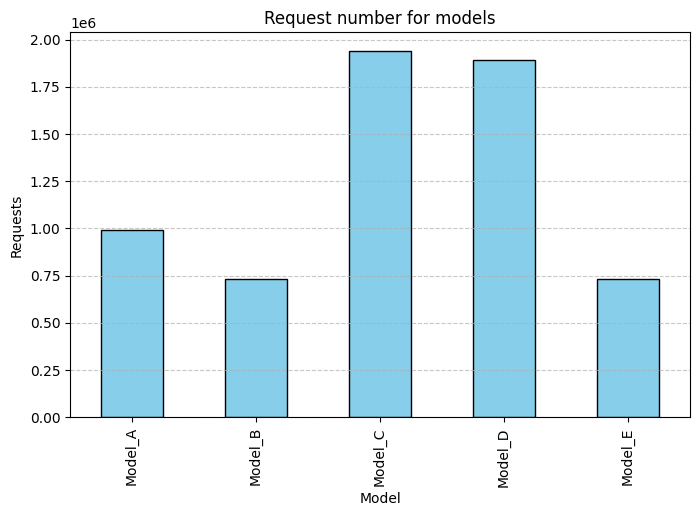

In [12]:
'''Analyze total requests per model, visualize results, and log the most used model'''

grouped_model = df.groupby('model')
model_requests = grouped_model['requests_cnt'].sum()
top_model = model_requests.idxmax()
top_val = model_requests.max()

ax = model_requests.plot(
    kind='bar',
    figsize=(8,5),
    color='skyblue',
    edgecolor='black',
    title='Request number for models'
)
ax.set_xlabel('Model')
ax.set_ylabel('Requests')
ax.grid(axis='y', linestyle='--', alpha=0.7)

logger.info(f"Most using model for request is: {top_model} with {top_val} requests")



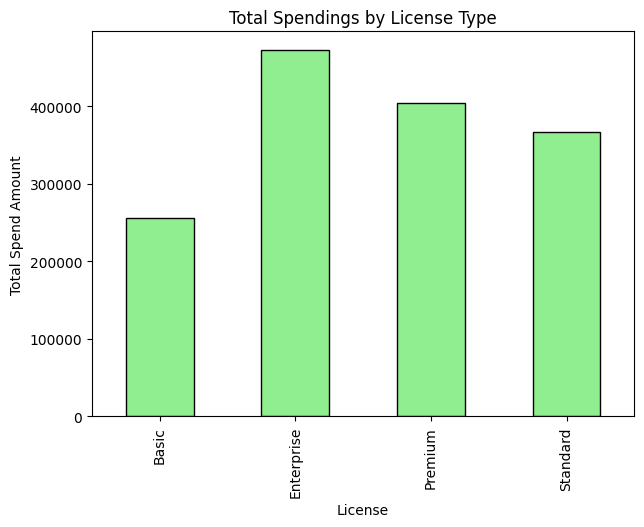

In [115]:
'''Analyze total spendings by license type, visualize results, and log which license spends the least and the most.'''

gropued_licenses_amounts = df.groupby('license')['spent_amount'].sum()
min_licences_amounts = gropued_licenses_amounts.idxmin()
max_licenses_amounts = gropued_licenses_amounts.idxmax()
max_percent_amounts = (gropued_licenses_amounts / gropued_licenses_amounts.sum()) * 100
max_percent = max_percent_amounts.max()

logger.info(f"Minimal spend amount have licence: {min_licences_amounts} and the biggest spendings have licence: {max_licenses_amounts} which is {max_percent}% of whole spends")

ax = gropued_licenses_amounts.plot(
    kind='bar',
    figsize=(7,5),
    color='lightgreen',
    edgecolor='black',
    title='Total Spendings by License Type'
)

ax.set_xlabel('License')
ax.set_ylabel('Total Spend Amount')
ax.ticklabel_format(style='plain', axis='y')





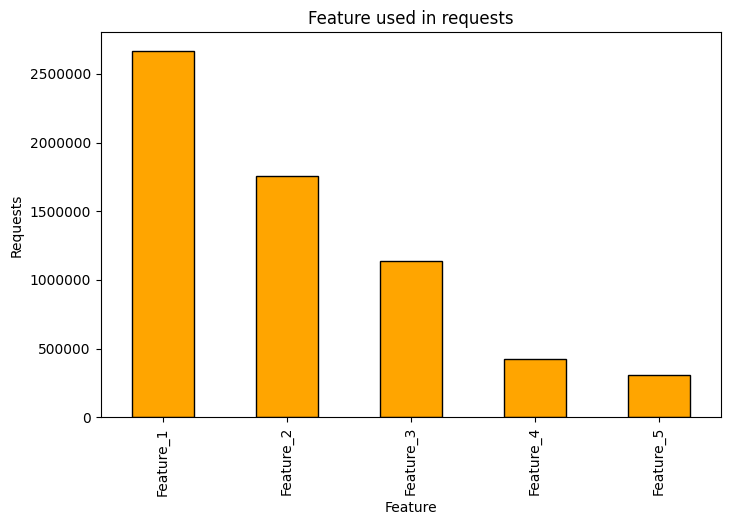

In [107]:
'''Analyze total requests per feature, visualize feature usage, and log which feature is the most frequently requested'''

grouped_feature_requests = df.groupby('feature')['requests_cnt'].sum()
feature_max_id = grouped_feature_requests.idxmax()

ax = grouped_feature_requests.plot(
    kind='bar',
    figsize=(8,5),
    color='orange',
    edgecolor='black',
    title='Feature used in requests'
)
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Feature')
ax.set_ylabel('Requests')

logger.info(f"The most requested feature is {feature_max_id}")

<Axes: title={'center': 'Requests vs Spendings per model'}, xlabel='model'>

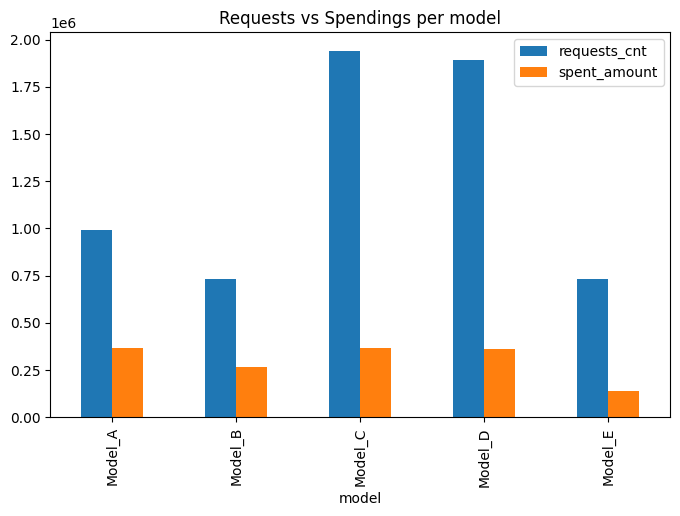

In [105]:
modelRequests_amount = df.groupby('model')[['requests_cnt', 'spent_amount']].sum()
modelRequests_amount.plot(kind='bar', figsize=(8,5), title='Requests vs Spendings per model')
logger.info("Models C and D have the highest number of requests, while spendings remain the same across models, except for Model E which is noticeably lower.")

          total_requests  total_spendings
uuid                                     
user_1            7917.0          1538.96
user_10           4260.0           843.37
user_100          3628.0          1128.27
user_101          1880.0           624.96
user_102          3346.0           671.40
...                  ...              ...
user_995            31.0            11.41
user_996            57.0            11.67
user_997           150.0            30.89
user_998            32.0            10.34
user_999           117.0            25.82

[1866 rows x 2 columns]


<Axes: title={'center': 'Relationship between requests and spendings'}, xlabel='total_requests', ylabel='total_spendings'>

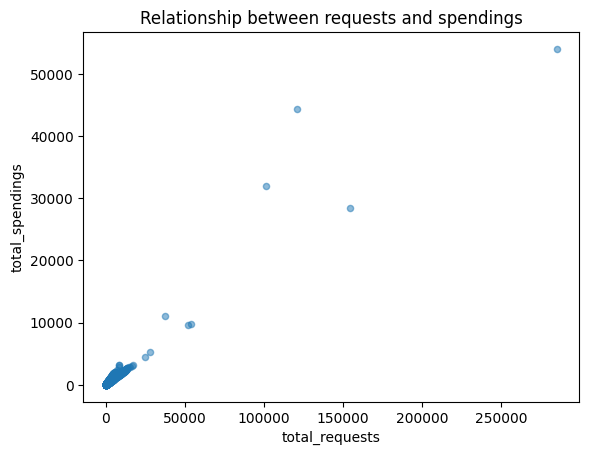

In [98]:
'''Chcked correlation between requests and spendings per user and visualize it'''

UserTable = df.groupby('uuid').agg(total_requests =('requests_cnt', 'sum'), total_spendings = ('spent_amount', 'sum') )

corr = UserTable['total_requests'].corr(UserTable['total_spendings'])
logger.info(f"Corr between requests and spendings: {corr:.2f}, meaning that users who make more requests also spend more.")

UserTable.plot(
    kind='scatter',
    x='total_requests',
    y='total_spendings',
    alpha=0.5,
    title='Relationship between requests and spendings'
)

<Axes: title={'center': 'Feature use per license'}, xlabel='license'>

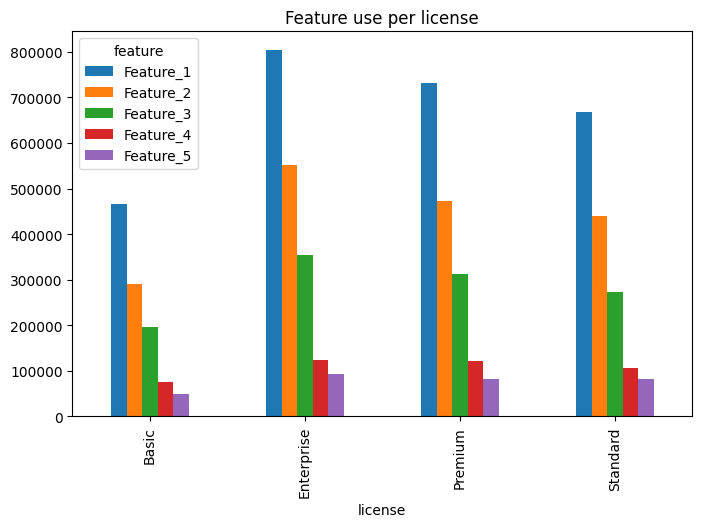

In [131]:
'''Analyze feature usage across models and licenses, visualize which features are most frequently used within each license type'''

model_feature = df.groupby(['model', 'feature'])['requests_cnt'].sum()
license_feature = df.groupby(['license', 'feature'])['requests_cnt'].sum()
license_feature = df.groupby(['license', 'feature'])['requests_cnt'].sum().unstack(fill_value=0)
license_feature.plot(kind='bar', figsize=(8,5), title='Feature use per license')

logger.info("Bar plot shows that Feature_2 dominates across all license types")



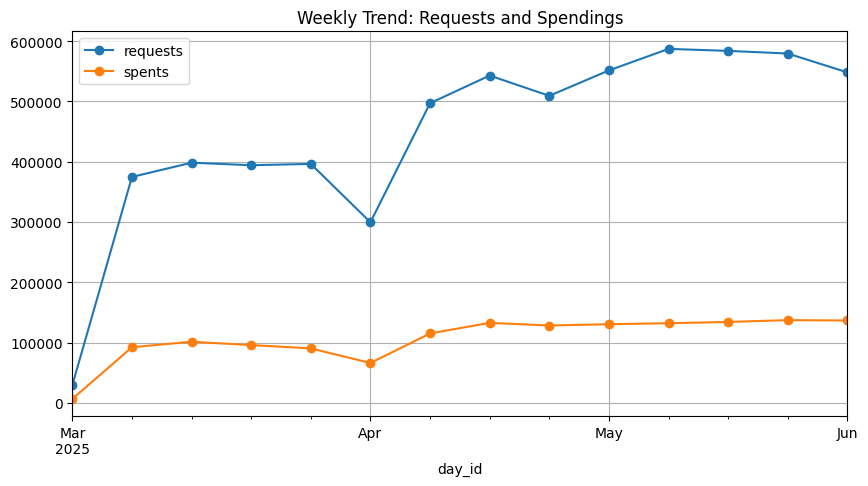

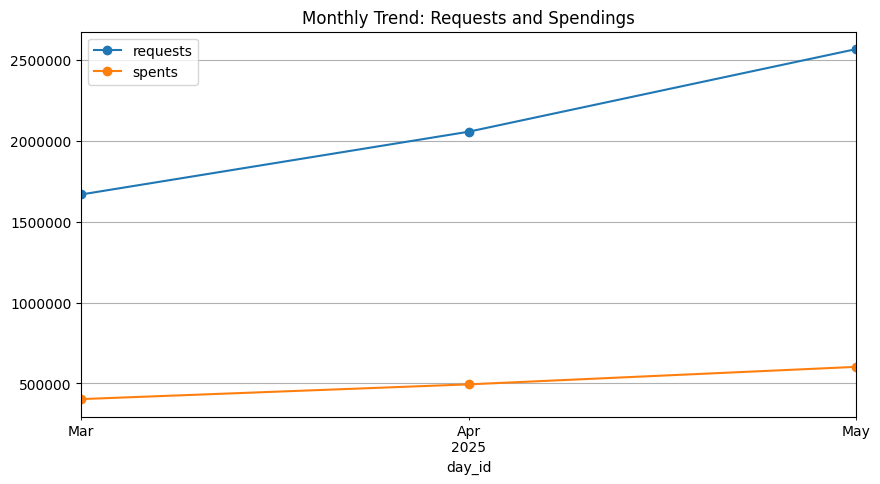

In [104]:
'''used gropuby and also pd.Grouper to aggreaate daily data into weeks and month totals,allowing visualization of "trendings"'''

df['day_id'] = pd.to_datetime(df['day_id'])
by_day = df.groupby('day_id').agg(requests=('requests_cnt','sum'),spents=('spent_amount', 'sum'))
by_week = df.groupby(pd.Grouper(key='day_id',  freq='W')).agg(requests=('requests_cnt', 'sum'),spents=('spent_amount', 'sum'))


by_week.plot(
    y=['requests', 'spents'],
    figsize=(10,5),
    title='Weekly Trend: Requests and Spendings',
    grid=True,
    marker='o'
)
logger.info("Weekly trend shows steady increase in requests from march to may while spendings remain below 150k per week")

by_month = df.groupby(pd.Grouper(key='day_id', freq='ME')).agg(requests=('requests_cnt', 'sum'),spents=('spent_amount', 'sum'))
ax = by_month.plot(
    y=['requests', 'spents'],
    figsize=(10,5),
    marker='o',
    title='Monthly Trend: Requests and Spendings',
    grid=True
)
ax.ticklabel_format(style='plain', axis='y')

logger.info("Requests increased steadily from 1.7M in march to 2.6M in may")